## Шаг 1. Подготовка и предобработка данных

#### Импорт необходимых библиотек

In [1]:
#common
import numpy as np
import pandas as pd 
import IPython
from IPython.display import display
import warnings
warnings.simplefilter('ignore')
import scipy.stats as st
import re

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

#ml
from sklearn.metrics import SCORERS, make_scorer
from sklearn.metrics import mean_squared_error,  r2_score, roc_auc_score, roc_curve, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder, Binarizer
from sklearn.preprocessing import QuantileTransformer, PolynomialFeatures
from sklearn.utils import shuffle, resample
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA

#classifiers

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#### Импорт и анализ датасетов

In [2]:
recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')
recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')

Напишем функцию, показывающую основные данные по каждому сету. 

In [3]:
def frame_info(df):
    
    print(df.info())
    print(df.shape)
    display(df.head(3))
    #print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    #df.describe().round()

In [4]:
dfs = [recovery_full, recovery_train, recovery_test]
dfs_names = ['recovery_full', 'recovery_train', 'recovery_test']

for df_, name in zip(dfs, dfs_names):
    
    print (name)
    print()
    display(frame_info(df_))

recovery_full

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressa

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


None

recovery_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depress

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


None

recovery_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null flo

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


None

#### Первичные наблюдения   
Три набора данных.  
87 и 53 столбца. До 22 тысяч строк. 
Присутствуют пропущенные значения. Дата в формате 'object'.
В сетах full и train присутствуют данные о содержании серебра (Ag), зола (?) (Sol), свинец (Pb) и золото (Au). Возможно, ненужные элементы можно дропнуть.  
Вероятно, каждому сету стоит присвоить индексы = дате - и потом через новые индексы производить необходимые преобразования сетов.

---

#### Проверка правильности рассчета "rougher.output.recovery"

Recovery, как известно из описания проекта, рассчитывается по следующей формуле:  
(привожу в виде кода, так она легче читается, в отличие от маркдауна)

In [5]:
# rougher.output.recovery =   
# (rougher.output.concentrate_au * (rougher.input.feed_au - rougher.output.tail_au)) /   
# (rougher.input.feed_au * (rougher.output.concentrate_au - rougher.output.tail_au)) *  
# 100

Перед расчетом значений recovery необходимо узнать, сколько именно пропущенных значений присутствует в датасете по столбцам.

In [6]:
recovery_train.isna().sum().sort_values(ascending=False).head(20)

rougher.output.recovery                     2573
rougher.output.tail_ag                      2250
rougher.output.tail_sol                     2249
rougher.output.tail_au                      2249
secondary_cleaner.output.tail_sol           1986
rougher.input.floatbank11_xanthate          1904
final.output.recovery                       1521
primary_cleaner.input.sulfate               1307
primary_cleaner.input.depressant            1262
rougher.calculation.au_pb_ratio             1242
rougher.input.floatbank10_sulfate           1044
primary_cleaner.input.xanthate               985
primary_cleaner.output.concentrate_sol       636
rougher.input.floatbank11_sulfate            623
rougher.state.floatbank10_e_air              603
rougher.input.feed_rate                      513
rougher.input.feed_size                      417
final.output.concentrate_sol                 370
secondary_cleaner.state.floatbank2_a_air     363
primary_cleaner.output.concentrate_pb        358
dtype: int64

Сколько потеряем данных, если просто дропнем все пропуски?

In [7]:
recovery_train_clear = recovery_train.dropna()
print('Потеря данных составит', 
      100 - int((len(recovery_train_clear) * 100 / len(recovery_train))), '%')

Потеря данных составит 35 %


Большой процент потерь, данный метот неприменим.  
  
  
Исследуем интересуемый столбец - 'rougher.output.recovery'

In [8]:
recovery_temp = recovery_train['rougher.output.recovery'].dropna()

print('Минимальное значние', recovery_temp.min())
print('Максимальное значние', recovery_temp.max())
print('Среднее значние', np.mean(recovery_temp))
print('Доверительный интервал признака rougher.output.recovery', 
      st.t.interval(0.95, len(recovery_temp)-1, loc=np.mean(recovery_temp), scale=st.sem(recovery_temp)))

Минимальное значние 0.0
Максимальное значние 100.0
Среднее значние 82.39420120842004
Доверительный интервал признака rougher.output.recovery (82.14663036018695, 82.64177205665314)


В целом, заполнив пропущенные значения "средним", которое имеет очень узкий доверительный интервал, мы, будем близки к нормальным показателям.  
Однако, пока оставим данный вопрос (узнаем у наставника/коллег мнения в чате) и рассчитаем требуемую метрику с дропом пропущенных значений конкретно в исследуемом столбце.

Рассчитаем "обновленную" метрику recovery после флотации и посмотрим на отличие от исходных данных

In [9]:
output_temp = recovery_train.dropna(axis='index', how='any', subset=['rougher.output.recovery'])
len(output_temp)

14287

In [10]:
rec_output_upd = pd.Series(  
    
    (output_temp['rougher.output.concentrate_au'] * 
     (output_temp['rougher.input.feed_au'] - output_temp['rougher.output.tail_au'])) / 
    
    (output_temp['rougher.input.feed_au'] * 
     (output_temp['rougher.output.concentrate_au'] - output_temp['rougher.output.tail_au'])) * 
    
    100)         

In [11]:
rec_output_temp = output_temp['rougher.output.recovery']

In [12]:
mae = mean_absolute_error(rec_output_upd, rec_output_temp).round(16)

print('MAE между рассчитанными и представленными составляет {}'.format(mae))

MAE между рассчитанными и представленными составляет 9.4e-15


Значение МАЕ крайне мало (отклонение рассчетных данных от представленных может быть не более 9.4e-15), следовательно, представленные данные рассчитаны верно. 

---

#### Анализ недоступных признаков тестовой выборки

Установим различие в названии столбцов между выборками recovery_train и recovery_test

In [13]:
features_train_set = recovery_train.columns
features_test_set = recovery_test.columns 

In [14]:
difference = (list(set(features_train_set) - set(features_test_set)))

print('Количество недостающих признаков в тестовом сете = ', len(difference))
print()
print('Признаки, отсутствующие в тестовом сете:')
print()
print(np.sort(difference))


Количество недостающих признаков в тестовом сете =  34

Признаки, отсутствующие в тестовом сете:

['final.output.concentrate_ag' 'final.output.concentrate_au'
 'final.output.concentrate_pb' 'final.output.concentrate_sol'
 'final.output.recovery' 'final.output.tail_ag' 'final.output.tail_au'
 'final.output.tail_pb' 'final.output.tail_sol'
 'primary_cleaner.output.concentrate_ag'
 'primary_cleaner.output.concentrate_au'
 'primary_cleaner.output.concentrate_pb'
 'primary_cleaner.output.concentrate_sol' 'primary_cleaner.output.tail_ag'
 'primary_cleaner.output.tail_au' 'primary_cleaner.output.tail_pb'
 'primary_cleaner.output.tail_sol' 'rougher.calculation.au_pb_ratio'
 'rougher.calculation.floatbank10_sulfate_to_au_feed'
 'rougher.calculation.floatbank11_sulfate_to_au_feed'
 'rougher.calculation.sulfate_to_au_concentrate'
 'rougher.output.concentrate_ag' 'rougher.output.concentrate_au'
 'rougher.output.concentrate_pb' 'rougher.output.concentrate_sol'
 'rougher.output.recovery' 'rougher.ou

В тестовом сете отсуствуют 34 признака, все принадлежат типу float64.  
Как и было указано в задании - отсуствуют значения финальных концентраций полезных элементов и а так же общей эффективности и отвальных хвостов.  
В основном, отсутствуют рассчитываемые показатели, следовательно, имея формулы для рассчета, можно получить значения недостающих признаков.  
Судя по заданию - целевыми признаками будут выступать rougher.output.recovery и final.output.recovery. 

---

#### Предобработка данных 

Как я понял, нам необходимо придерживаться следующего алгоритма: 

1. Полная предобработка full сета 
2. Подтягивание необходимых значений в train и test. Так как у нас нет формул для расчета недостающих признаков - мы можем подтянуть их только из full'a.

Пока буду работать так.

##### Индексация, перевод даты
  
Перенесем значения столбца 'date' в индекс датасетов для дальнейшей индексации и создадим новый столбец date_time, который переведем в формат даты.

In [15]:
def data_index(df):
    
    df_= df
    df_['date_time'] = df_['date']
    
    df_ = df_.set_index('date')
    
    cols = df_.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_ = df_[cols]
    
    df_['date_time'] = pd.to_datetime(df_['date_time'], format='%Y-%m-%dT%H:%M:%S')
    
    return df_

In [16]:
rec_full = data_index(recovery_full)
rec_full.head()

,date_time,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Применим функцию к оставшимся сетам

In [17]:
rec_train = data_index(recovery_train)
rec_test = data_index(recovery_test)

##### Заполнение пропусков  

Проведем анализ пропущенных значений во всех сетах.

In [18]:
rec_full.isna().sum().sort_values(ascending=False)

rougher.output.recovery                     3119
rougher.output.tail_ag                      2737
rougher.output.tail_sol                     2736
rougher.output.tail_au                      2736
rougher.input.floatbank11_xanthate          2257
                                            ... 
primary_cleaner.state.floatbank8_b_level      43
primary_cleaner.state.floatbank8_c_level      43
primary_cleaner.state.floatbank8_d_level      43
primary_cleaner.input.feed_size                0
date_time                                      0
Length: 87, dtype: int64

In [19]:
rec_train.isna().sum().sort_values(ascending=False)

rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_sol                               2249
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_sol                     1986
                                                      ... 
rougher.calculation.sulfate_to_au_concentrate           27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
primary_cleaner.input.feed_size                          0
date_time                                                0
Length: 87, dtype: int64

In [20]:
rec_test.isna().sum().sort_values(ascending=False).head(5)

rougher.input.floatbank11_xanthate    353
primary_cleaner.input.sulfate         302
primary_cleaner.input.depressant      284
rougher.input.floatbank10_sulfate     257
primary_cleaner.input.xanthate        166
dtype: int64

Больше всего пропущенных значений в одном из целевых столбцов 'rougher.output.recovery'  

---

Удалим наблюдения с отсутствующими целевыми признаками, так как восстанавливать их по "усредненным" значениям, как начинающий data-scientist считаю неправильным.

In [21]:
rec_full = rec_full.dropna(axis='index', how='any', subset=['rougher.output.recovery', 'final.output.recovery'])
rec_train = rec_train.dropna(axis='index', how='any', subset=['rougher.output.recovery', 'final.output.recovery'])

---

Остальные пропуски, заполним ближайшими (верхними) значениями по столбцам, поскольку из условий проекта следует, что "Соседние по времени параметры часто похожи."

In [22]:
rec_full = rec_full.fillna(method='ffill')
rec_train = rec_train.fillna(method='ffill')
rec_test = rec_test.fillna(method='ffill')

<font color='green'>Да, все корректно. </font>


In [23]:
print(rec_full.isna().sum().unique()) 
print(rec_train.isna().sum().unique())
print(rec_test.isna().sum().unique())

[0]
[0]
[0]


In [24]:
new_frame = [rec_full, rec_train, rec_test]
old_frame = [recovery_full, recovery_train, recovery_test]
names = ['full', 'train', 'test']

for new, old, name in zip(new_frame, old_frame, names):

    temp = 100-(len(new)*100/len(old))
    
    print('Потери сета {} после обработки = {:.5}'.format(name, temp))

Потери сета full после обработки = 14.426
Потери сета train после обработки = 16.079
Потери сета test после обработки = 0.0


Мы теряем от 16 до 14% от первоначальных данных.  
Not great, not terrible.  
В любом случае - восстанавливать таргеты по каким-либо значениям не считаю грамотным вариантом.

---

Отбросим из сета train все фичи, которые не встречаются в сете test, чтобы уровнять количество признаков для построения моделей.  
1. Дропнем целевые признаки из переменной difference, в которой у нас сохранены отличающиеся столбцы train и test сетов.  
2. Удалим обновленный список столбцов из сета train.

In [25]:
unwanted = {'rougher.output.recovery','final.output.recovery'}

difference_ = [e for e in difference if e not in unwanted]

rec_train_upd = rec_train.drop(difference_, axis=1)

rec_train_upd.shape[1], rec_test.shape[1]

(55, 53)

<font color='green'>Верно, в обучающей выборке нужно оставить только те признаки, которые есть в тестовой. </font>


Разница в 2 столбца - это отсуствие таргета в сете rec_test.  

---  

Добавим таргеты из rec_full в rec_test, соотвтетсвие установим по индексу.

In [26]:
rec_test_upd = rec_test.join(rec_full['rougher.output.recovery'])
rec_test_upd = rec_test_upd.join(rec_full['final.output.recovery'])

In [27]:
rec_test_upd.head()

,date_time,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


Проверим правильность присоединения столбцов.  
При правильном переносе данных, должны быть положительные ответы в обоих случаях

In [28]:
(rec_full.loc['2016-09-01 00:59:59']['rougher.output.recovery'] == 
rec_test_upd.loc['2016-09-01 00:59:59']['rougher.output.recovery'])

True

In [29]:
(rec_full.loc['2016-09-01 00:59:59']['final.output.recovery'] == 
 rec_test_upd.loc['2016-09-01 00:59:59']['final.output.recovery'])

True

И финальная проверка соответсвия столбцов rec_train_upd и rec_test_upd, подготовленных для дальнейшей обработки

In [30]:
train_cols = rec_train_upd.columns.tolist()
test_cols = rec_test_upd.columns.tolist()

list(set(train_cols) - set(test_cols)), list(set(test_cols) - set(train_cols))

([], [])

Проверим последовательность столбцов в обучающей и тестовой выборке.

Оба списки пустые - в двух сетах одинаковые столбцы.  

Удалим пропущенные значения в таргетах в сете rec_test_upd, которые попали сюда при добавлении столбцов с таргетом и rec_full.

In [31]:
rec_test_upd.isna().sum().sort_values(ascending=False).head(2)

final.output.recovery      566
rougher.output.recovery    566
dtype: int64

In [32]:
rec_test_upd = rec_test_upd.dropna(axis='index', how='any', subset=['rougher.output.recovery', 'final.output.recovery'])

In [33]:
rec_test_upd.isna().sum().sort_values(ascending=False).head()

final.output.recovery                 0
rougher.input.feed_ag                 0
rougher.state.floatbank10_a_level     0
rougher.state.floatbank10_a_air       0
rougher.input.floatbank11_xanthate    0
dtype: int64

---

Соединение данных в тестовом сете произведено верно.  
Сортировать порядок столбцов не имеет смысла. Можно сбросить все индексы, но пока оставим, как есть, возможно, где-то в дальнейшем, они еще пригодятся.  
В выборках rec_train_upd и rec_test_upd по 55 одинаковых столбцов.

Предобработка завершена, переходим к выводам по первому шагу.

### Вывод 

На данном шаге произведено знакомство с данными, и выпоплены первые шаги проекта. За время работы установлено следующее:

1. В предложенных данных ~ 30% пропущенных значений;  
2. Целевыми признаками данных являются столбцы 'rougher.output.recovery' и 'final.output.recovery';  
3. Рассчетные значения столбца 'rougher.output.recovery' в сете recovery_train демонстрируют значение средней абсолютной ошибки, в сравнении с представленными значениями, равной 9.4e-15. Можно утверждать, что представленные данные посчитаны корректно. 

В процессе предобработки дата была преведена в читаемый вид, были удалены строки с пропущенным значенем целевых признаков во всех трех сетах, пропущенные значения фич заполнены методом "ближаших верхних соседей" - "ffill".  
Из первоначального сета recovery_train были удалены фичи, которых нет в recovery_test. В recovery_test были добавлены целевые признаки из recovery_full.

В целом, за время предобработы, было удалено ~16% изначальных данных, за счет дропа неизвестных целевых признаков.  

rec_full готов для исследования признаков (пункт 2 проекта)  
rec_train_upd и rec_test_updatet подготовленны для построения моделей (пункт 3 проекта)  

Предобработка завершена, переходим к следующему шагу.  

---

## Шаг 2. Анализ данных

#### Анализ концентрации металлов на всех стадиях обогащения  

Все исследования на данном шаге будут производиться на сете rec_full, поскольку он обладает полным запасом необходимых данных.  
  
Необходимо провести исследование на стадиях - сырье до обработки / сырье после флотации / сырье после первого этапа очистки / сырье после второго этапа очистки. 
Необходимо отобрать столбцы со значением 'concentrate'. К ним добавятся столбцы вхождения сырья input.feed.

Для данного анализа сбросим индекс у сета rec_full

In [34]:
rec_full_ = rec_full.copy()
rec_full_ = rec_full_.reset_index(drop=True)

Создадим список всех столбцов и последовательно очистим его от ненужных значений.

In [35]:
col_full = rec_full_.columns.tolist()

col_concentrate = [v for v in col_full if 'concentrate' in v]
col_input = [v for v in col_full if 'rougher.input.feed' in v]

col_con_inp = col_concentrate + col_input

col_final = [v for v in col_con_inp if 'ag' in v or 'au' in v or 'pb' in v]

col_final

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au']

Осталось удалить только отношение сульфата к золоту и развернуть список, чтобы операции следовали друг за другом в логическом порядке.

In [36]:
col_final.remove('rougher.calculation.sulfate_to_au_concentrate')

In [37]:
col_final

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au']

In [38]:
col_final.reverse()

In [39]:
col_final

['rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_ag']

Разведем каждый металл и соберем фреймы по каждому металлу

In [40]:
col_ag = [v for v in col_final if 'ag' in v]
col_au = [v for v in col_final if 'au' in v]
col_pb = [v for v in col_final if 'pb' in v]

In [41]:
conc_ag = rec_full_[col_ag].rename(columns={'rougher.input.feed_ag' : 'rougher.input',
                                            'rougher.output.concentrate_ag' : 'rougher.output',
                                            'primary_cleaner.output.concentrate_ag' : 'primary_cleaner.output',
                                            'final.output.concentrate_ag' : 'final.output'})

conc_au = rec_full_[col_au].rename(columns={'rougher.input.feed_au' : 'rougher.input',
                                            'rougher.output.concentrate_au' : 'rougher.output',
                                            'primary_cleaner.output.concentrate_au' : 'primary_cleaner.output',
                                            'final.output.concentrate_au' : 'final.output'})

conc_pb = rec_full_[col_pb].rename(columns={'rougher.input.feed_pb' : 'rougher.input',
                                            'rougher.output.concentrate_pb' : 'rougher.output',
                                            'primary_cleaner.output.concentrate_pb' : 'primary_cleaner.output',
                                            'final.output.concentrate_pb' : 'final.output'})

In [42]:
conc_au.head()

,rougher.input,rougher.output,primary_cleaner.output,final.output
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


Таблицы готовы к построению графиков.  
Завернем функцию по построению графиков с доверительным интервалом и средним.

Применим функцию к каждому металлу.

In [43]:
def concentration_analyst(data, name):
    
    sns.set(style='whitegrid')

    fig, ax = plt.subplots(1,4, sharey=True, figsize=(10,5))
    
    columns = data.columns
    colors = ['silver', 'darkgrey', 'grey', 'dimgrey']

    for i in range(len(columns)):
    
        sns.pointplot(color=colors[i], y=columns[i], capsize=.03, linewidth=2.5, ax=ax[i], data=data)
        ax[i].set_xlabel(columns[i])
        ax[i].set_ylabel('')
    
    fig.suptitle('Сравнение концентрации {} на технологических этапах'.format(name), size=14, y=(0.94))
    fig.show()

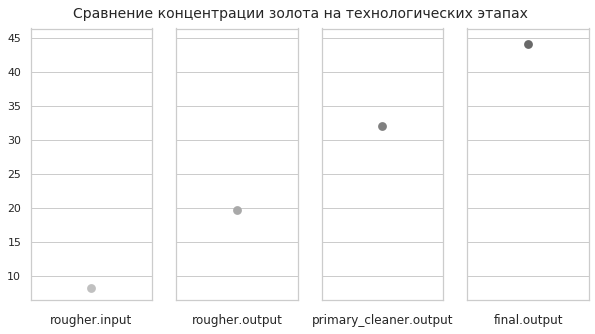

In [44]:
concentration_analyst(conc_au, 'золота')

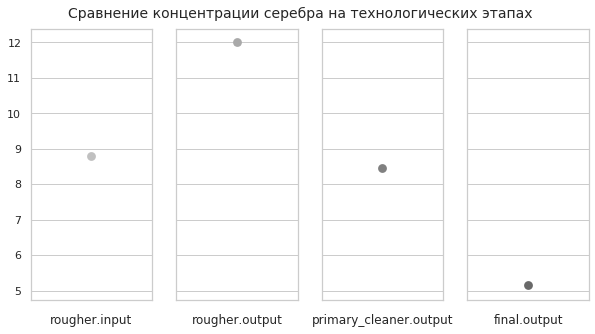

In [45]:
concentration_analyst(conc_ag, 'серебра')

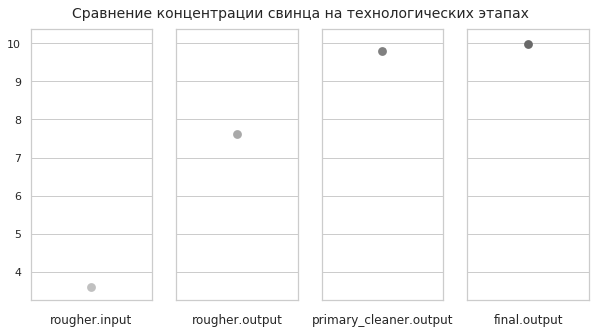

In [46]:
concentration_analyst(conc_pb, 'свинца')

Золото показывает итоговый 4х кратный рост при концентрации при обогащении. При этом обогащение золота происходит равномерно на каждом этапе.  
Концентрация серебра падает на этапах первичной и вторичной очистки, вероятно в связи с особенностями обработки (!! обратить внимание коллег из технологического отдела).  
Свинец показывает итоговое 2,5 кратное увеличение концентрации, макмисальный скачек заметен на этапе флотации.  

Так как наша основная цель - обогащение руды с целью максимальной добычи золота - при полученных результатах, компания движется в правильном направлении.  

Разброс значений по этапам в зависимости от времени оказался не слишком велик, хвосты доверительных интервалов не видны на данном масштабе графика.  

---

In [47]:
def concentration_analyst_2(data, name):
    
    sns.set(style='whitegrid')

    fig, ax = plt.subplots(4,1, sharex=True, sharey=True, figsize=(13,8))
    
    columns = data.columns
    colors = ['silver', 'darkgrey', 'grey', 'dimgrey']

    for i in range(len(columns)):
    
        sns.distplot(a=data.iloc[:,i], ax=ax[i], color=colors[i], kde=True)
        ax[i].set_xlabel(columns[i])
        ax[i].set_ylabel('')
    
    fig.suptitle('Распределение концентрации {} на технологических этапах'.format(name), size=14, y=(0.94))
    fig.show()

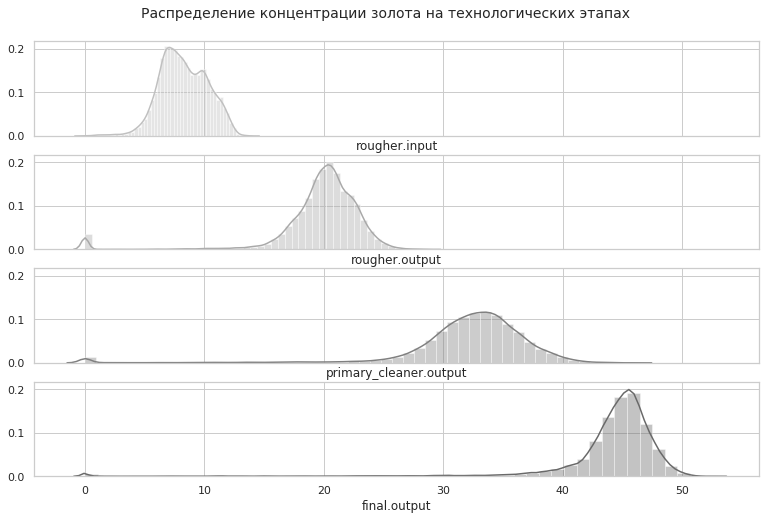

In [48]:
concentration_analyst_2(conc_au, 'золота')

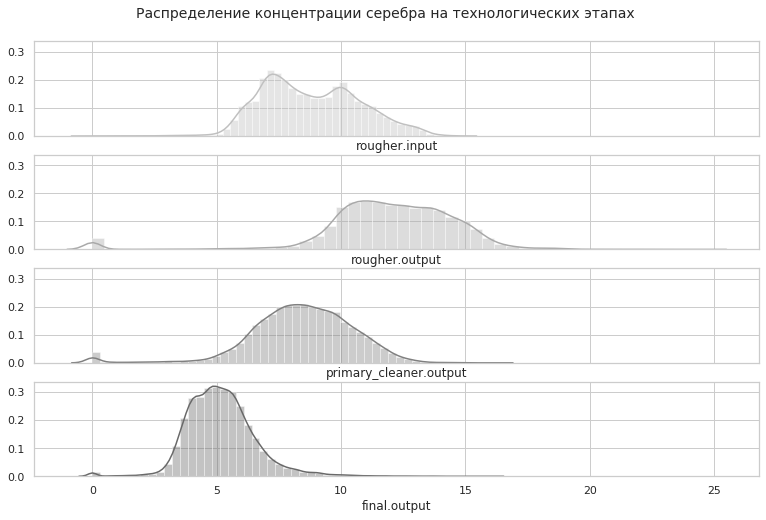

In [49]:
concentration_analyst_2(conc_ag, 'серебра')

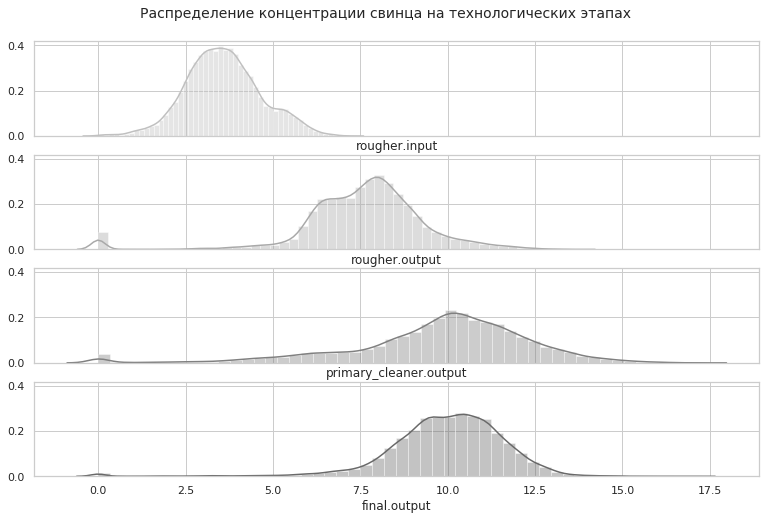

In [50]:
concentration_analyst_2(conc_pb, 'свинца')

####  Сравнение размеров гранул сырья

Посмотрим, на каких этапах встречается размер гранул сырья - выделим все столбцы со значениями feed и size.

In [51]:
train_cols = rec_train_upd.columns.tolist()

In [52]:
feed_size_cols = [v for v in train_cols if 'feed_size' in v]
feed_size_cols

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

Мы можем проследить размер сырья на входе во флоатоционную установку и в установку первичной очистки.  

Создадим отдельные датасеты для тренировойчной и тестовой выборки.

In [53]:
feed_size_train = rec_train_upd[feed_size_cols].reset_index(drop=True)
feed_size_test = rec_test_upd[feed_size_cols].reset_index(drop=True)

Проанализируем размер гранул в момент входа в флоатационную камеру.

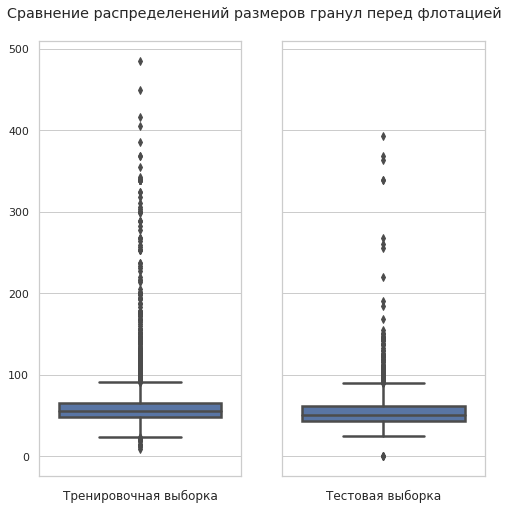

In [54]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,8))

sns.boxplot(y='rougher.input.feed_size', linewidth=2.5, data=feed_size_train, ax=ax[0])
ax[0].set_xlabel('Тренировочная выборка')
ax[0].set_ylabel('')

sns.boxplot(y='rougher.input.feed_size', linewidth=2.5, data=feed_size_test, ax=ax[1])
ax[1].set_xlabel('Tестовая выборка')
ax[1].set_ylabel('')

plt.suptitle('Сравнение распределенений размеров гранул перед флотацией', y=0.94);

Много "выбросов", отбросим их и построим "боксы".

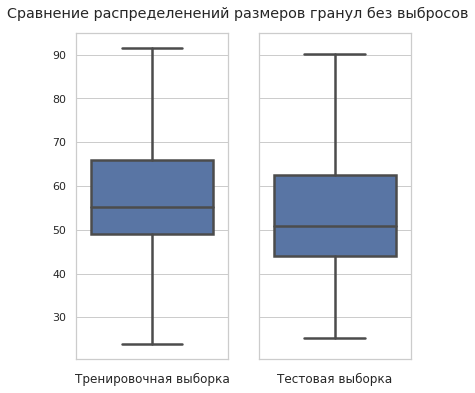

In [55]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(6,6))

sns.boxplot(y='rougher.input.feed_size', linewidth=2.5, data=feed_size_train, ax=ax[0], showfliers=False)
ax[0].set_xlabel('Тренировочная выборка')
ax[0].set_ylabel('')

sns.boxplot(y='rougher.input.feed_size', linewidth=2.5, data=feed_size_test, ax=ax[1], showfliers=False)
ax[1].set_xlabel('Tестовая выборка')
ax[1].set_ylabel('')

plt.suptitle('Сравнение распределенений размеров гранул без выбросов', y=0.94);

Как видно из графиков выше, оба средних значения по выборкам попадают в диапазон 25-75 квартиль обоих выборок, что может говорить примерном равном распредении размеров гранул на тестовой и тренировочной выборке.  
Выбросы расположились +- одинаково, в тренировочной выборке наблюдается бОльшая плотность выбросов у верхнего "уса" боксплота.

---

Проанализирум размер гранул на входе в камеру первичной очистки.

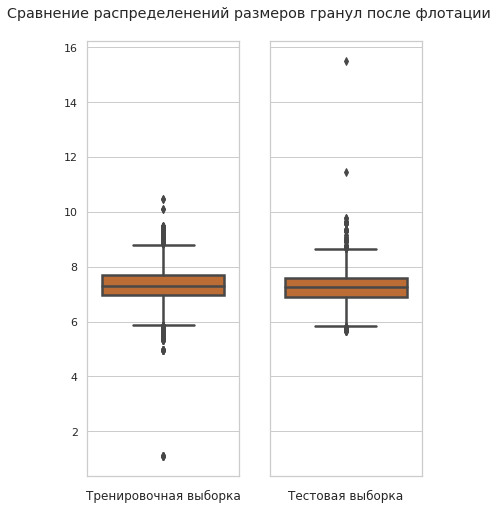

In [56]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(6,8))

sns.boxplot(y='primary_cleaner.input.feed_size', linewidth=2.5, data=feed_size_train, ax=ax[0], color='chocolate')
ax[0].set_xlabel('Тренировочная выборка')
ax[0].set_ylabel('')

sns.boxplot(y='primary_cleaner.input.feed_size', linewidth=2.5, data=feed_size_test, ax=ax[1], color='chocolate')
ax[1].set_xlabel('Tестовая выборка')
ax[1].set_ylabel('')

plt.suptitle('Сравнение распределенений размеров гранул после флотации', y=0.94);

Как видно на графике выше, гранулы сырья распределены практически одинаково, однако, заметны выбросы мелкого размера на тренировочной выборке и слишком крупный размер гранул на тестовой.  
Возможно в дальнейшем удалим строки с данным значениями выбросов.  

Итог:  
Основываясь на текущих выводах следует заключить, что выборки подходят для построения моделей.  


#### Исследование суммарной концентрации веществ  

Для данного исследования используем уже имеющийся список столбцов с концетрацией металлов и немного его "подправим".

In [57]:
con_all = col_con_inp.copy()

In [58]:
con_all = [v for v in con_all if 'primary_cleaner' not in v]
con_all = [v for v in con_all if 'ag' in v or 'au' in v or 'pb' in v or 'sol' in v]
con_all.remove('rougher.calculation.sulfate_to_au_concentrate')

In [59]:
con_all.reverse()

Создадим датафрейм со значениями получившихся колонок.

In [60]:
elem_conc = rec_full[con_all]
elem_conc.head()

,rougher.input.feed_au,rougher.input.feed_sol,rougher.input.feed_pb,rougher.input.feed_ag,rougher.output.concentrate_au,rougher.output.concentrate_sol,rougher.output.concentrate_pb,rougher.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_sol,final.output.concentrate_pb,final.output.concentrate_ag
date,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,36.808594,2.284912,6.100378,19.793808,28.029297,7.101074,11.500771,42.192020,5.507324,9.889648,6.055403
2016-01-15 01:00:00,6.478583,35.753385,2.266033,6.161113,20.050975,28.067063,7.278807,11.615865,42.701629,5.257781,9.968944,6.029369
2016-01-15 02:00:00,6.362222,35.971630,2.159622,6.116455,19.737170,27.454037,7.216833,11.695753,42.657501,5.383759,10.213995,6.055926
2016-01-15 03:00:00,6.118189,36.862241,2.037807,6.043309,19.320810,27.341277,7.175616,11.915047,42.689819,4.858634,9.977019,6.047977
2016-01-15 04:00:00,5.663707,34.347666,1.786875,6.060915,19.216101,27.041023,7.240205,12.411054,42.774141,4.939416,10.142511,6.148599


In [61]:
elem_conc['raw'] = elem_conc.iloc[:,0] + elem_conc.iloc[:,1] + elem_conc.iloc[:,2] + elem_conc.iloc[:,3]
elem_conc['halfstock'] = elem_conc.iloc[:,4] + elem_conc.iloc[:,5] + elem_conc.iloc[:,6] + elem_conc.iloc[:,7]
elem_conc['final'] = elem_conc.iloc[:,8] + elem_conc.iloc[:,9] + elem_conc.iloc[:,10] + elem_conc.iloc[:,11]

In [62]:
elem_conc.head()

,rougher.input.feed_au,rougher.input.feed_sol,rougher.input.feed_pb,rougher.input.feed_ag,rougher.output.concentrate_au,rougher.output.concentrate_sol,rougher.output.concentrate_pb,rougher.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_sol,final.output.concentrate_pb,final.output.concentrate_ag,raw,halfstock,final
date,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,36.808594,2.284912,6.100378,19.793808,28.029297,7.101074,11.500771,42.192020,5.507324,9.889648,6.055403,51.680034,66.424950,63.644396
2016-01-15 01:00:00,6.478583,35.753385,2.266033,6.161113,20.050975,28.067063,7.278807,11.615865,42.701629,5.257781,9.968944,6.029369,50.659114,67.012710,63.957723
2016-01-15 02:00:00,6.362222,35.971630,2.159622,6.116455,19.737170,27.454037,7.216833,11.695753,42.657501,5.383759,10.213995,6.055926,50.609929,66.103793,64.311180
2016-01-15 03:00:00,6.118189,36.862241,2.037807,6.043309,19.320810,27.341277,7.175616,11.915047,42.689819,4.858634,9.977019,6.047977,51.061546,65.752751,63.573449
2016-01-15 04:00:00,5.663707,34.347666,1.786875,6.060915,19.216101,27.041023,7.240205,12.411054,42.774141,4.939416,10.142511,6.148599,47.859163,65.908382,64.004667


Построим распределения веществ на трех этапах обогащения.

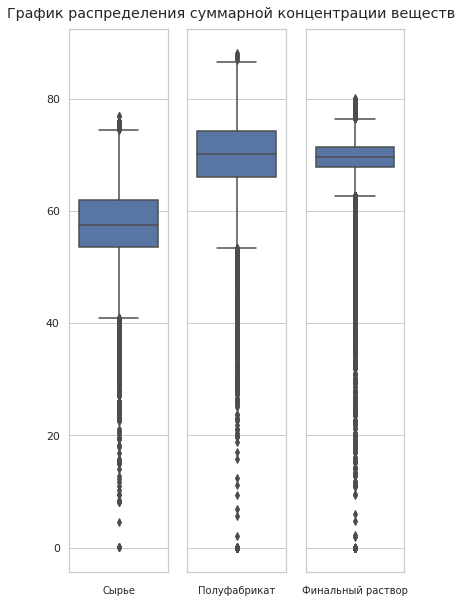

In [63]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(6,10))

sns.boxplot(y='raw', data=elem_conc, ax=ax[0])
ax[0].set_xlabel('Сырье', size=10)
ax[0].set_ylabel('')

sns.boxplot(y='halfstock', data=elem_conc, ax=ax[1])
ax[1].set_xlabel('Полуфабрикат', size=10)
ax[1].set_ylabel('')

sns.boxplot(y='final', data=elem_conc, ax=ax[2])
ax[2].set_xlabel('Финальный раствор', size=10)
ax[2].set_ylabel('')

plt.suptitle('График распределения суммарной концентрации веществ', y=.91)
plt.show()

In [64]:
temp = (len(elem_conc) - len(elem_conc[elem_conc['raw'] >= 35])) / len(elem_conc)

print('Потери данных составят {:%}'.format(temp))

Потери данных составят 1.064870%


1% данных мы можем отбросить, без сильной потери качества данных.

In [65]:
elem_conc_upd = elem_conc.query('raw >= 35')

In [66]:
elem_conc_upd.head()

,rougher.input.feed_au,rougher.input.feed_sol,rougher.input.feed_pb,rougher.input.feed_ag,rougher.output.concentrate_au,rougher.output.concentrate_sol,rougher.output.concentrate_pb,rougher.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_sol,final.output.concentrate_pb,final.output.concentrate_ag,raw,halfstock,final
date,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,36.808594,2.284912,6.100378,19.793808,28.029297,7.101074,11.500771,42.192020,5.507324,9.889648,6.055403,51.680034,66.424950,63.644396
2016-01-15 01:00:00,6.478583,35.753385,2.266033,6.161113,20.050975,28.067063,7.278807,11.615865,42.701629,5.257781,9.968944,6.029369,50.659114,67.012710,63.957723
2016-01-15 02:00:00,6.362222,35.971630,2.159622,6.116455,19.737170,27.454037,7.216833,11.695753,42.657501,5.383759,10.213995,6.055926,50.609929,66.103793,64.311180
2016-01-15 03:00:00,6.118189,36.862241,2.037807,6.043309,19.320810,27.341277,7.175616,11.915047,42.689819,4.858634,9.977019,6.047977,51.061546,65.752751,63.573449
2016-01-15 04:00:00,5.663707,34.347666,1.786875,6.060915,19.216101,27.041023,7.240205,12.411054,42.774141,4.939416,10.142511,6.148599,47.859163,65.908382,64.004667


In [67]:
rec_full_new = rec_full.query('index in @elem_conc_upd.index')
rec_train_new = rec_train_upd.query('index in @elem_conc_upd.index')
rec_test_new = rec_test_upd.query('index in @elem_conc_upd.index')

In [68]:
print('Потери обучающей выборки =', len(rec_train_upd) - len(rec_train_new), 'наблюдения')
print('Потери тестовой выборки =', len(rec_test_upd) - len(rec_test_new), 'наблюдения')

Потери обучающей выборки = 163 наблюдения
Потери тестовой выборки = 44 наблюдения


Потери выборок составили 207 наблюдений в сумме, что составляет всего 1% от общих данных. 

Все пункты данного шага выполнены, переходим к выводам.

### Вывод 

На данном шаге производился визуальный аналих полного наборан данных (rec_full) и подготовленных для дальнейшего анализа выборок (rec_train_upd и rec_test_upd).  
В ходе анализа выявлены следующие особенности:
1. Концентрация металлов на разных стадия очистки изменяется по-разному: золото демонстрирует повышение концентрации в 4 раза, свинец - в 2,5 раза, серебро падает в 1,5 раза. Данную особенность требуется обсудить с технологическим отделом.  
2. Распределение гранул сырья в тестовой и обучающей выборке примерно одинаково, что позволяет использовать данные выборки для построения моделей. Сушествуют несколько выбросов, посмотрим, будут ли они сильно влиять на модели.  
3. При построении суммарной концентрации веществ на трех этапах производства, выявлены вероятные аномалии. Отброшены "хвосты" с рекордно низкими значениями (до 35 единиц). В процессе очистки выборок удален 1% данных.  

Выборки rec_train_new и rec_test_new готовы к построению моделей.

---

## 3. Построение моделей, прогнозирование эффективности обогащения

#### Функция для рассчета sMAPE  

Переведем формулу из описания проекта в читаемый питоном вид

In [69]:
def smape(true, pred):
    
    smape_rough = 100/len(true[:,0]) * np.sum(2 * np.abs(pred[:,0] - true[:,0]) / (np.abs(true[:,0]) + np.abs(pred[:,0])))
    smape_final = 100/len(true[:,1]) * np.sum(2 * np.abs(pred[:,1] - true[:,1]) / (np.abs(true[:,1]) + np.abs(pred[:,1])))
    
    smape_final = smape_rough*0.25 + smape_final*0.75
    
    return smape_final

#### Подбор модели

Создадим рандом_стейт

In [71]:
rnd_st = np.random.randint(100)

Таргеты - столбцы 'rougher.output.recovery', 'final.output.recovery'
Фичи - все остальные признаки.  
  
Разбитие выборок на 1 набор фич и 2 таргета на текущий момент считаю актуальным. Возможно, это утверждение неверно, тогда будем исправлять в дальнейшем.
  
 Сразу разобьем и обучающую и тестовую выборки.

In [72]:
rec_train_new = rec_train_new.drop('date_time', axis=1).reset_index(drop=True)
rec_test_new = rec_test_new.drop('date_time', axis=1).reset_index(drop=True)

In [73]:
target_ind = ['rougher.output.recovery', 'final.output.recovery']

feat_train = rec_train_new.drop(target_ind, axis=1)
targ_train = np.array(rec_train_new[target_ind])

feat_test = rec_test_new.drop(target_ind, axis=1)
targ_test = np.array(rec_test_new[target_ind])

Фичи и таргеты составлены. Переходим к выбору модели.  

Для тестирования моделей кросс-валидацией необходимо создать собственный scorer, который будет высчитывать sMAPЕ. Для этого применим метод make_scorer.

In [74]:
smape_score = make_scorer(smape, greater_is_better=False)

---

Составим модели для дальнейшего исследования.    
Для поиска лучших параметров будем использовать мин-макс скалер и пайплайн.

Пропишем пайпы для 3 моделей.

В дополнительные 2 модели не удалось направить 2 таргета на фит =/

In [75]:
pipe_lr = Pipeline([('mm',MinMaxScaler()),('lr', LinearRegression(n_jobs=-1))])

pipe_rfr = Pipeline([('mm',MinMaxScaler()),('rfr', RandomForestRegressor(n_estimators=15, random_state=rnd_st, n_jobs=-1))])

pipe_knn = Pipeline([('mm',MinMaxScaler()),('knn', KNeighborsRegressor(n_jobs=-1))])

#pipe_sgdr = Pipeline([('mm',MinMaxScaler()),('sgdr', SGDRegressor(max_iter=1000))])

#pipe_svr = Pipeline([('mm',MinMaxScaler()),('svr', SVR(C=1.0))])

Пропишем словари для поиска лучших параметров.

In [76]:
params_lr = dict(lr__fit_intercept=['True', 'False'])

params_rfr = dict(rfr__n_estimators=[20, 50, 100, 200],
                  rfr__min_samples_leaf=range(1,4))

params_knn = dict(knn__n_neighbors=range(5,10),
                  knn__metric=['minkowski', 'manhattan'],
                  knn__leaf_size=range(30,50,5),
                  knn__algorithm = ['auto', 'ball_tree', 'kd_tree'])

#params_sgdr = dict(sgdr__loss=['squared_loss', 'huber', 'epsilon_insensitive'],
                   #sgdr__epsilon=[0.1,0.2,0.3],
                   #sgdr__tol=[1e-3, 1e-4])

#params_svr = dict(svr__c=[0.8, 0.9, 1],
                  #svr_epsilon=[0.2,0.4,0.6],
                  #svr__gamma=['scale', 'auto'])
                 

In [77]:
pipes = [pipe_lr, pipe_rfr, pipe_knn]
params = [params_lr, params_rfr, params_knn]
models = ['linear regression',
          'random forest',
          'nearest neighbors']

Поиск с одним ядром происходит очень долго в отличие от локальной машины, я закомментил данный пункт, чтобы при проверке тетради не тратить лишнее время.  
Результаты привожу в строчке ниже.

In [78]:
#for model, pipe, param in zip(models, pipes, params):
    
    #search = RandomizedSearchCV(pipe, param, verbose=5, scoring=smape_score, cv=3, n_jobs=-1)
    
    #search.fit(feat_train, targ_train)
    
    #print(model)
    #print(search.best_score_)
    #print(search.best_params_)
    #print()

---

Обновленный список

linear regression  
-14.703972743024798  
{'lr__fit_intercept': 'True'}    

среднее время рассчета 3,1 сек

random forest  
-10.810  
{rfr__n_estimators=100, rfr__min_samples_leaf=2}  

среднее время рассчета 49,8 сек  - мдауш

nearest neighbors  
-13.319173222150805  
{'knn__n_neighbors': 9, 'knn__metric': 'manhattan', 'knn__leaf_size': 40, 'knn__algorithm': 'ball_tree'}    

среднее время рассчета 5,5 сек

In [79]:
#lr1 = LinearRegression()
#rfr1 = RandomForestRegressor(random_state=rnd_st, n_estimators=15, min_samples_leaf=1)
#knn1 = KNeighborsRegressor(n_neighbors=6, metric='manhattan', leaf_size=30, algorithm='ball_tree')

#models = [lr1, rfr1, knn1]
#names = ['linear regression',
          #'random forest',
          #'nearest neighbors']

In [80]:
#for model, name in zip(models, names):
    
    #cvs = cross_val_score(model, feat_train_scaled, targ_train, scoring=smape_score, cv=5, n_jobs=-1)
    
   # print(name)
    #print('Результат кросс валидации')
    #print(cvs)
    #print('Средний результат кросс валидации = {}'.format(np.mean(cvs)))
    #print()

In [81]:
scaler = MinMaxScaler()

scaler.fit(feat_train)

feat_train_scaled = scaler.transform(feat_train)
feat_test_scaled = scaler.transform(feat_test)

In [82]:
model_final = RandomForestRegressor(random_state=rnd_st, n_estimators=100, min_samples_leaf=2)

In [83]:
def smape(true, pred):
    
    smape_rough = 100/len(true[:,0]) * np.sum(2 * np.abs(pred[:,0] - true[:,0]) / (np.abs(true[:,0]) + np.abs(pred[:,0])))
    smape_final = 100/len(true[:,1]) * np.sum(2 * np.abs(pred[:,1] - true[:,1]) / (np.abs(true[:,1]) + np.abs(pred[:,1])))
    
    smape_final = smape_rough*0.25 + smape_final*0.75
    
    return smape_final

In [84]:
def smape_upd(true, pred):
    
    rough_ = []
    final_ = []
    
    for i in range(len(true)):
        
        if 0 <= np.abs(true[i,0]) + np.abs(pred[i,0]) <= 0.01:
                 
                 rough_.append(0)
                 final_.append(0)
        
        else :
    
                 rough_.append(2 * np.abs(pred[i,0] - true[i,0]) / (np.abs(true[i,0]) + np.abs(pred[i,0])))
                 final_.append(2 * np.abs(pred[i,1] - true[i,1]) / (np.abs(true[i,1]) + np.abs(pred[i,1])))
     
    rough_sum = np.sum(rough_)
    final_sum = np.sum(final_)
    
    smape_rough = 100/len(true[:,1]) * rough_sum
    smape_final = 100/len(true[:,1]) * final_sum
                 
    smape_final = smape_rough*0.25 + smape_final*0.75
    
    return smape_final

In [85]:
model_final.fit(feat_train_scaled, targ_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=30, verbose=0,
                      warm_start=False)

In [86]:
train_predict = model_final.predict(feat_train_scaled)

sm = smape_upd(targ_train, train_predict)

print('sMAPE на тестовой выборке = {}'.format(np.around(sm,2)))

sMAPE на тестовой выборке = 3.73


---

#### Проверка модели на тестовой выборке  

Обучаем модель на выборке feat_train_scaled и таргетах train_test.  
Предсказываем feat_test_scaled

In [87]:
#model_final.fit(feat_train_scaled, targ_train)

preds = model_final.predict(feat_test_scaled)

Подставляем в функцию smape предсказаные и настоящие значения. Смотрим на результат.

In [88]:
sm_fin = smape(targ_test, preds)

print('sMAPE на тестовой выборке = {}'.format(np.around(sm_fin,2)))

sMAPE на тестовой выборке = 10.04


In [89]:
sm_fin_u = smape_upd(targ_test, preds)

print('sMAPE на тестовой выборке = {}'.format(np.around(sm_fin_u,2)))

sMAPE на тестовой выборке = 10.04


По итогу, мы будет отклоняться в предсказаниях на 10 процентов от реальных значений на тестовой выборке. 

В реальной жизни - консультация с тимлидом / коллегами / технологическим отделом. Переходим к выводам.

Проверим модель на адекватность

In [90]:
preds_upd = targ_test.copy()

In [91]:
preds_upd[:,0], preds_upd[:,1] = targ_train[:,0].mean(), targ_train[:,1].mean()

In [92]:
preds_upd

array([[82.87637544, 66.69535771],
       [82.87637544, 66.69535771],
       [82.87637544, 66.69535771],
       ...,
       [82.87637544, 66.69535771],
       [82.87637544, 66.69535771],
       [82.87637544, 66.69535771]])

In [93]:
sm_fin_test = smape(targ_test, preds_upd)

print('sMAPE для константной модели 1го варианта = {}'.format(np.around(sm_fin_test,2)))

sMAPE для константной модели 1го варианта = 9.89


In [94]:
from sklearn.dummy import DummyRegressor

In [95]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(feat_train_scaled, targ_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [96]:
preds = dummy_regr.predict(feat_train_scaled)

In [97]:
sm_fin_test = smape_upd(targ_test, preds_upd)

print('sMAPE для dummy regressor = {}'.format(np.around(sm_fin_test,2)))

sMAPE для dummy regressor = 9.89


### Вывод 

На шаге 3 производились подбор и тестирование моделей.  
Для улучшения метрики было дополнительно использовано скалирование фич методом MinMaxScaler.

Лучшей моделью был признан Случайный лес с параметрами  
n_neighbors=100, mas_samples_leaf=2


На тестовой выборке удалость улучшить значение показателя sMAPE = 10,17.  

Финальный результат получен, переходим к общему выводу.  

---

## Общий вывод

Целью настоящего проекто было составление модели для прогнозирования метрики sMAPE - симметричного среднего абсолютного процентного отклонения.

В третьем шаге была успешно создана и апробирована модель ближайших соседей, готовая для ввода в экслуатаци.

Финальным значением метрики sMAPE на тестовой выборке стал показателе 10,17. что является приемлемым показателем с учетом известных значений.

Задачами проекта являлись следующие пункты: 

Подготовка данных:
На данном этапе были обработаны пропущенные значения и удалены неизвестные таргеты с целью последующего постоения моделей. Потери данных составили ~16%, много, но других вариантов восстановить таргеты правильно выявлено не было.  

Исследовательский анализ данных:
Замечены следующие закономерности - концентрация золота на всех этапах обогащения растет, в сумме возрастает в 4 раза с 8 до 42 пунктов, концентрация свинца растет в 2,5 раза, концетрация серебра падает в 2 раза.  
Общая концентрация металлов в растворе показывает серьезный рост после флотации, однако на последующей очистке не растет.  
На данном этапе были отброшены, вероятно, аномальные значение концентрации. Потери данных составили 1%.  

Построить и обучить модель:  
Протестировано 3 модели - регрессия, случайный лес и ближайшие соседи.   

На тестовой выборке финальная модель показала значение sMAPE = 10,17, что, вероятно, является допустимым уровнем в данном проекте.


Несмотря на то, что константая модель показала в ряде случаев лучший результат, считаю, что удалось достичь основной цели исследования.

---